# Education & Training Information

## Author: Ram Saran Vuppuluri

### Introduction

Kaggle had initiated an industry-wide survey in 2017 that presents a truly comprehensive view of the state of data science and machine learning. In 2018, the study was live for a week in October and had collected responses from 23,859 individuals.

Data set used for the analysis is has 390+ columns. Not all columns are needed at any given point of the study. For this reason, the notebook is further divided into multiple subsections which will start with a business question, followed by data analysis. Only the columns that are related to the business question are extracted for analysis.

Furthermore, we are persisting extracted columns into separate csv files that are utilized for generating visualizations using Tableau for Medium blog post.

__One significant advantage with this approach is we are not ignoring the whole row if the respondent has not to answer specific questions. We are going to include all the answers (non-freeform) in the analysis.__

In this notebook, we will analyze the Education and Training information of survey takers. 

In [1]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def generate_vertical_countplot(x, xlabel='', figName=None, figSize=(8, 6)):
    '''
    This method will generate vertical Seaborn countplot.

    :param x: x parameter

    :param xlabel: x axis label

    :param figName: file name by which it need to be stored.

    :param figSize: plot figure size.

    :return: None
    '''
    sns.set(rc={'figure.figsize': figSize})

    ax = sns.countplot(x=x)

    plt.xlabel(xlabel)
    if figName != None:
        ax.get_figure().savefig(figName)
    plt.show(ax);

In [3]:
def generate_horizontal_countplot(y, ylabel='', figName=None, figSize=(12, 10)):
    '''
    This method will generate horizontal Seaborn countplot/

    :param y: y parameter

    :param ylabel: y axis label

    :param figName: file name by which it need to be stored

    :param figSize: plot figure size.

    :return: None
    '''
    sns.set(rc={'figure.figsize': figSize})

    ax = sns.countplot(y=y)

    plt.ylabel(ylabel)

    if figName != None:
        ax.get_figure().savefig(figName)
    plt.show(ax);

In [4]:
def generate_bar_plot(data, x, y, xlabel='', ylabel='', figName=None, figSize=(12, 10)):
    '''
    This method will generate Seaborn Bar plot.

    :param data: Pandas Dataframe.

    :param x: x parameter

    :param y: y parameter

    :param xlabel: x axis label

    :param ylabel: y axis label

    :param figName: file name by which it need to be stored

    :param figSize: plot figure size.

    :return: None
    '''
    sns.set(rc={'figure.figsize': figSize})
    ax = sns.barplot(x=x, y=y, data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.get_figure().savefig(figName)
    plt.show(ax);

In [5]:
multipleChoiceDF = pd.read_csv('../multipleChoiceResponses.csv',low_memory=False)

### What is the highest level of formal education that you have attained or plan to accomplish within the next 2 years? Which best describes your undergraduate major?

In [6]:
educationDF = multipleChoiceDF[['Q4','Q5']]

In [7]:
educationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 2 columns):
Q4    23439 non-null object
Q5    22948 non-null object
dtypes: object(2)
memory usage: 372.9+ KB


In [8]:
educationDF.head()

,Q4,Q5
0,What is the highest level of formal education ...,Which best describes your undergraduate major?...
1,Doctoral degree,Other
2,Bachelor’s degree,Engineering (non-computer focused)
3,Master’s degree,"Computer science (software engineering, etc.)"
4,Master’s degree,"Social sciences (anthropology, psychology, soc..."


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* There are some values in the response that are too big and won't look suitable for visual analysis. We will replace these values with a much smaller string while not losing any knowledge.
* Column names are not informative, we will rename columns with more informative names.

In [9]:
educationDF.drop([0],inplace=True)
educationDF.reset_index(drop=True,inplace=True)

In [10]:
educationDF.head()

,Q4,Q5
0,Doctoral degree,Other
1,Bachelor’s degree,Engineering (non-computer focused)
2,Master’s degree,"Computer science (software engineering, etc.)"
3,Master’s degree,"Social sciences (anthropology, psychology, soc..."
4,Master’s degree,Mathematics or statistics


In [11]:
educationDF.Q4.value_counts()

Master’s degree                                                      10855
Bachelor’s degree                                                     7083
Doctoral degree                                                       3357
Some college/university study without earning a bachelor’s degree      967
Professional degree                                                    599
I prefer not to answer                                                 345
No formal education past high school                                   232
Name: Q4, dtype: int64

In [12]:
educationDF.Q4.replace(to_replace='Some college/university study without earning a bachelor’s degree',
                       value='Bachelor’s degree (not graduated)',inplace=True)

In [13]:
educationDF.sort_values("Q4",inplace=True)
educationDF.reset_index(drop=True,inplace=True)

__Contrary to the prevailing belief the number of respondents with Ph.D. is less than the number of individuals with other highest level of formal education.__

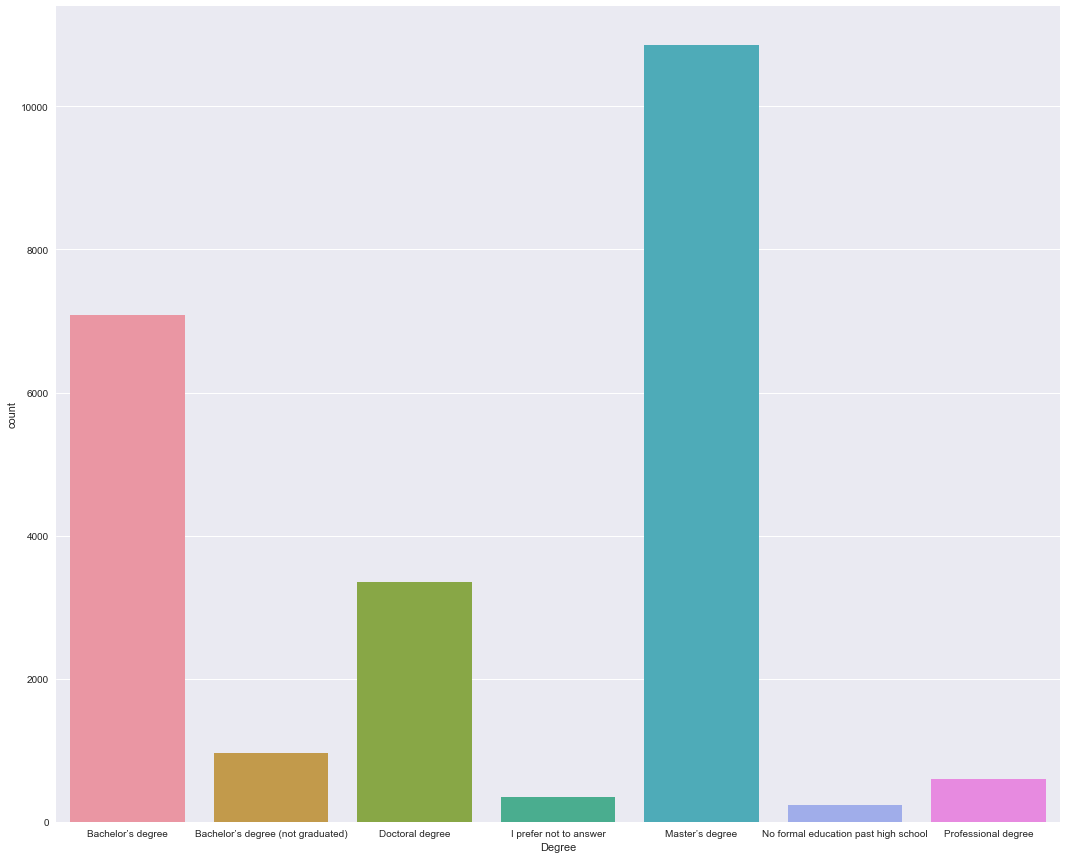

In [14]:
generate_vertical_countplot(x=educationDF.Q4,
                            xlabel="Degree",
                            figName='Degree_Distribution.jpeg',
                            figSize=(18,15))

In [15]:
educationDF.Q5.value_counts()

Computer science (software engineering, etc.)                    9430
Engineering (non-computer focused)                               3705
Mathematics or statistics                                        2950
A business discipline (accounting, economics, finance, etc.)     1791
Physics or astronomy                                             1110
Information technology, networking, or system administration     1029
Medical or life sciences (biology, chemistry, medicine, etc.)     871
Other                                                             770
Social sciences (anthropology, psychology, sociology, etc.)       554
Humanities (history, literature, philosophy, etc.)                269
Environmental science or geology                                  253
I never declared a major                                          128
Fine arts or performing arts                                       87
Name: Q5, dtype: int64

In [16]:
educationDF.Q5.replace(to_replace='Computer science (software engineering, etc.)',
                       value='Computer science',inplace = True)
educationDF.Q5.replace(to_replace='Engineering (non-computer focused)',
                       value='Engineering',inplace = True)
educationDF.Q5.replace(to_replace='A business discipline (accounting, economics, finance, etc.)',
                       value='Business Discipline',inplace = True)
educationDF.Q5.replace(to_replace='Medical or life sciences (biology, chemistry, medicine, etc.)',
                       value='Medical or life sciences',inplace = True)
educationDF.Q5.replace(to_replace='Social sciences (anthropology, psychology, sociology, etc.)',
                       value='Social sciences',inplace = True)
educationDF.Q5.replace(to_replace='Humanities (history, literature, philosophy, etc.)',
                       value='Humanities',inplace = True)

In [17]:
educationDF.sort_values("Q5",inplace=True)
educationDF.reset_index(drop=True,inplace=True)

__Most of the respondents have their Undergraduate majors in Computer science followed by Engineering.__

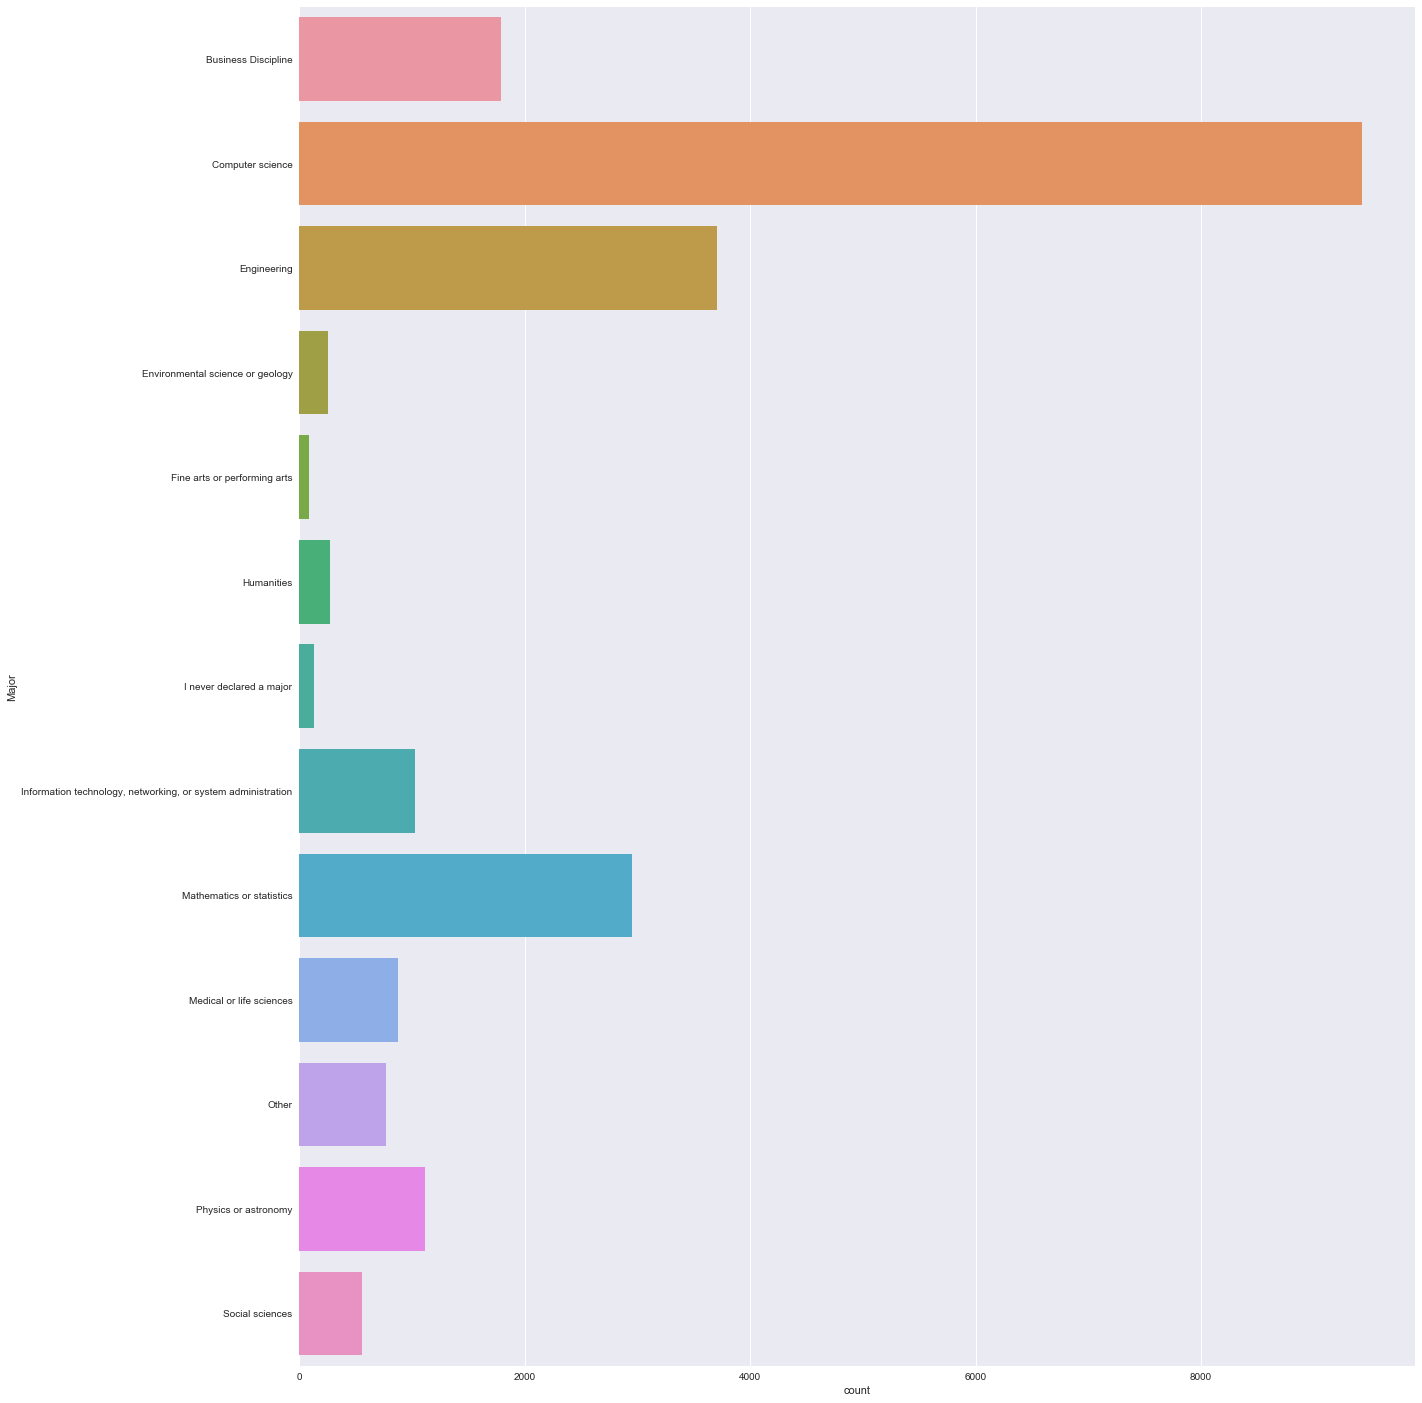

In [18]:
generate_horizontal_countplot(y=educationDF.Q5,
                             figSize=(20,25),
                             ylabel = 'Major',
                             figName = 'Major_Distribution.jpeg')

In [19]:
educationDF.rename(columns={"Q4":"Degree","Q5":"Major"},inplace=True)

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "educationDF" in the analysis. We will clean up from memory.

In [20]:
educationDF.to_csv("education.csv",index=False)

In [21]:
del educationDF
gc.collect()

14

### What percentage of your current machine learning/data science training falls under each category?
* __Self-taught__
* __Online courses__
* __Work__
* __University__
* __Kaggle competitions__

In [22]:
trainingSourceDF = multipleChoiceDF[['Q35_Part_1','Q35_Part_2','Q35_Part_3','Q35_Part_4','Q35_Part_5','Q35_Part_6']]

In [23]:
trainingSourceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 6 columns):
Q35_Part_1    15746 non-null object
Q35_Part_2    15746 non-null object
Q35_Part_3    15746 non-null object
Q35_Part_4    15746 non-null object
Q35_Part_5    15746 non-null object
Q35_Part_6    15746 non-null object
dtypes: object(6)
memory usage: 1.1+ MB


In [24]:
trainingSourceDF.head()

,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6
0,What percentage of your current machine learni...,What percentage of your current machine learni...,What percentage of your current machine learni...,What percentage of your current machine learni...,What percentage of your current machine learni...,What percentage of your current machine learni...
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,100,0,0
4,40,40,10,0,10,0


From the visual and programmatic analysis:
* There are rows with missing data, but deviating from data we explored till now, missing information is expected per record as selections are optional. We will melt into one single column removing missing values, and use this column for analysis.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* Column names are not informative, we will rename columns with more informative names.

In [25]:
trainingSourceDF.drop([0],inplace=True)
trainingSourceDF.reset_index(drop=True,inplace=True)

In [26]:
trainingSourceDF.head()

,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,100,0,0
3,40,40,10,0,10,0
4,20,40,20,20,0,0


In [27]:
trainingSourceDF.rename(columns={"Q35_Part_1":"Self-taught",
                                 "Q35_Part_2":"Online courses",
                                 "Q35_Part_3":"Work",
                                 "Q35_Part_4":"University",
                                 "Q35_Part_5":"Kaggle Competitions",
                                 "Q35_Part_6":"Other"},
                        inplace = True)

In [28]:
trainingSourceDF = pd.melt(trainingSourceDF)

In [29]:
trainingSourceDF.head()

,variable,value
0,Self-taught,NaN
1,Self-taught,NaN
2,Self-taught,0
3,Self-taught,40
4,Self-taught,20


In [30]:
trainingSourceDF.rename(columns={"variable":"Training-Mode"},inplace=True)

In [31]:
trainingSourceDF.sort_values("Training-Mode",inplace=True)
trainingSourceDF.reset_index(drop=True,inplace=True)

In [32]:
trainingSourceDF.dropna(inplace=True)
trainingSourceDF.reset_index(drop=True,inplace=True)

In [33]:
trainingSourceDF['value']=trainingSourceDF.value.astype(float)

__From the survey response, a typical data scientist has acquired more than half of their knowledge by self-study and online courses.__

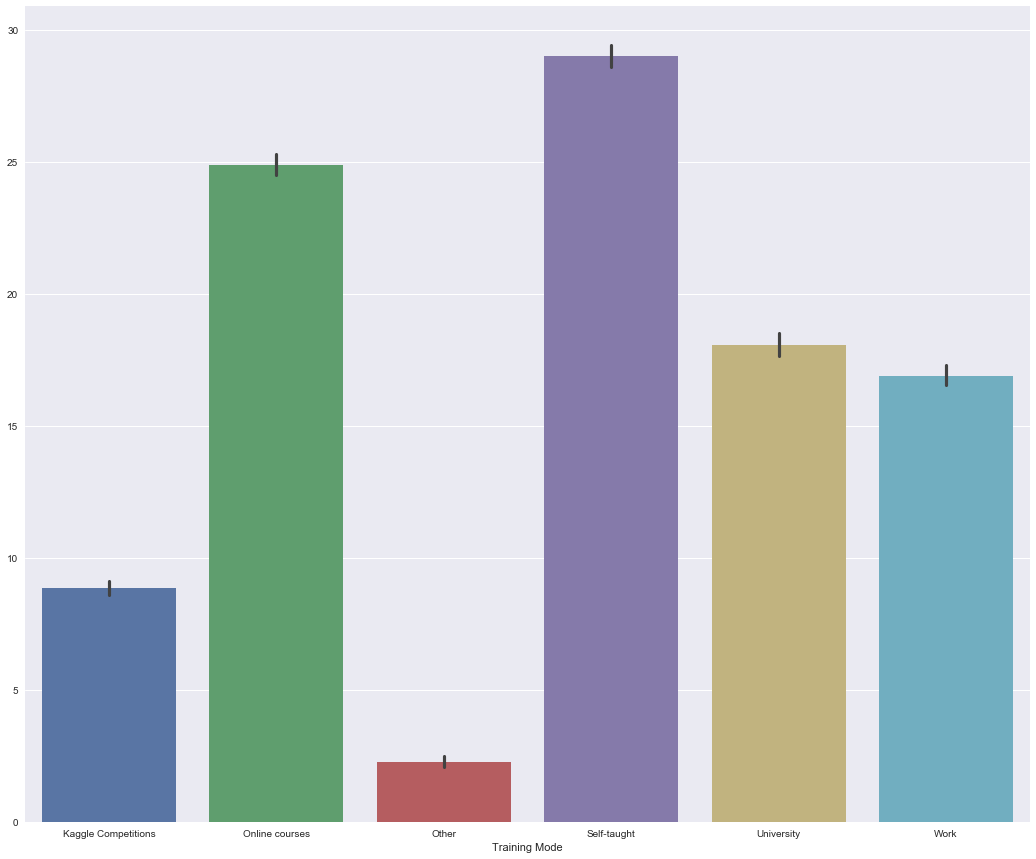

In [34]:
generate_bar_plot(data=trainingSourceDF,
                  x="Training-Mode",
                  y="value",
                  xlabel="Training Mode",
                  figName="Training Mode_Distribution.jpeg",
                  figSize=(18, 15))

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "trainingSourceDF" in the analysis. We will clean up from memory.

In [35]:
trainingSourceDF.to_csv('trainingMode.csv',index=False)

In [36]:
del trainingSourceDF
gc.collect()

2984

### On which online platforms have you begun or completed data science courses?
* __Udacity__
* __Coursera__
* __edX__
* __DataCamp__
* __DataQuest__
* __Kaggle Learn__
* __Fast.AI__
* __developers.google.com__
* __Udemy__
* __TheSchool.AI__
* __Online University Courses__
* __None__

In [37]:
onlineSourceDF = multipleChoiceDF[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6',
                                   'Q36_Part_7','Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12',
                                   'Q36_Part_13']]

In [38]:
onlineSourceDF.head()

,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13
0,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...,On which online platforms have you begun or co...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN
4,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
onlineSourceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 13 columns):
Q36_Part_1     3677 non-null object
Q36_Part_2     9027 non-null object
Q36_Part_3     3664 non-null object
Q36_Part_4     4246 non-null object
Q36_Part_5     709 non-null object
Q36_Part_6     4003 non-null object
Q36_Part_7     1571 non-null object
Q36_Part_8     1041 non-null object
Q36_Part_9     4331 non-null object
Q36_Part_10    280 non-null object
Q36_Part_11    1953 non-null object
Q36_Part_12    1977 non-null object
Q36_Part_13    1245 non-null object
dtypes: object(13)
memory usage: 2.4+ MB


From the visual and programmatic analysis:
* There are rows with missing data, but deviating from data we explored till now, missing information is expected per record as selections are optional. We will melt into one single column removing missing values, and use this column for analysis.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* Column names are not informative, we will rename columns with more informative names.

In [40]:
onlineSourceDF.drop([0],inplace=True)
onlineSourceDF.reset_index(drop=True,inplace=True)

In [41]:
onlineSourceDF.head()

,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN
3,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Udacity,Coursera,edX,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
onlineSourceDF = onlineSourceDF.melt()

In [43]:
onlineSourceDF.head()

,variable,value
0,Q36_Part_1,NaN
1,Q36_Part_1,NaN
2,Q36_Part_1,NaN
3,Q36_Part_1,NaN
4,Q36_Part_1,Udacity


In [44]:
onlineSourceDF.drop(columns=['variable'],inplace=True)

In [45]:
onlineSourceDF.dropna(inplace=True)

In [46]:
onlineSourceDF.rename(columns={'value':'Online_Source'},inplace=True)

__Coursera stands out as the most enrolled online resources followed by Udemy. Most of the online resources, have a diverse catalog of courses available and have flexible enrollment start dates. Some even offer peer reviews, quizzes, and mentorship to mimic traditional education.__

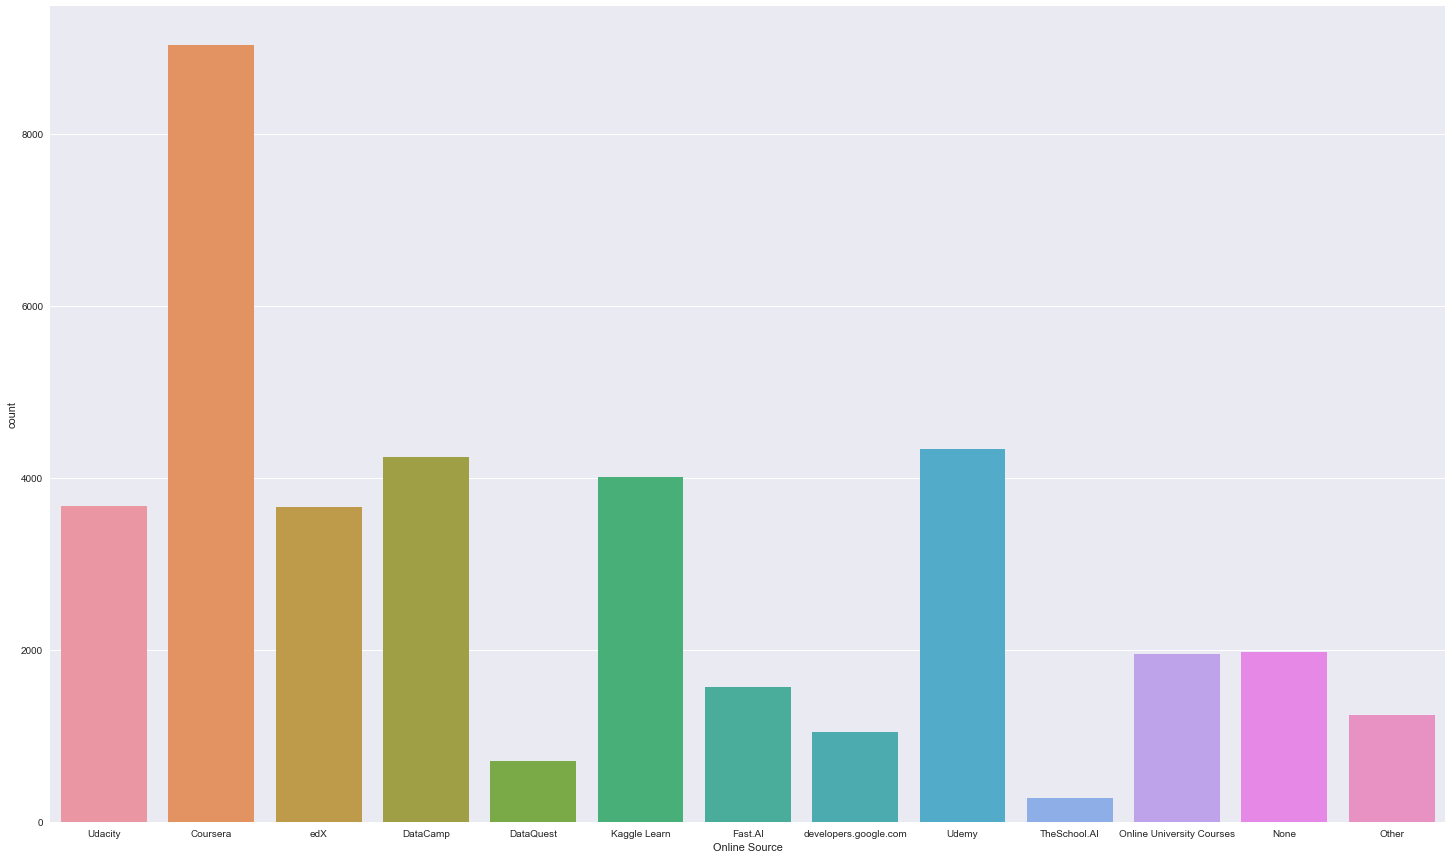

In [47]:
generate_vertical_countplot(x=onlineSourceDF.Online_Source,
                            xlabel="Online Source",
                            figName='Online Source Distribution.jpeg',
                            figSize=(25,15))

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "onlineSourceDF" in the analysis. We will clean up from memory.

In [48]:
onlineSourceDF.to_csv("online_source.csv",index=False)

In [49]:
del onlineSourceDF
gc.collect()

3219

### Which online platform have you spent the most amount of time?

In [50]:
onlineSourceDF = pd.DataFrame(multipleChoiceDF['Q37'])

In [51]:
onlineSourceDF.head()

,Q37
0,On which online platform have you spent the mo...
1,NaN
2,NaN
3,DataCamp
4,Coursera


In [52]:
onlineSourceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 1 columns):
Q37    9671 non-null object
dtypes: object(1)
memory usage: 186.5+ KB


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* Column names are not informative, we will rename columns with more informative names.

In [53]:
onlineSourceDF.drop([0],inplace=True)
onlineSourceDF.reset_index(drop=True,inplace=True)

In [54]:
onlineSourceDF.head()

,Q37
0,NaN
1,NaN
2,DataCamp
3,Coursera
4,Coursera


In [55]:
onlineSourceDF.dropna(inplace=True)
onlineSourceDF.reset_index(drop=True,inplace=True)

In [56]:
onlineSourceDF.rename(columns={'Q37':'Online_Favorite'},inplace=True)

__Coursera stands out as the most enrolled online resources followed by Udemy. Most of the online resources, have a diverse catalog of courses available and have flexible enrollment start dates. Some even offer peer reviews, quizzes, and mentorship to mimic traditional education.__

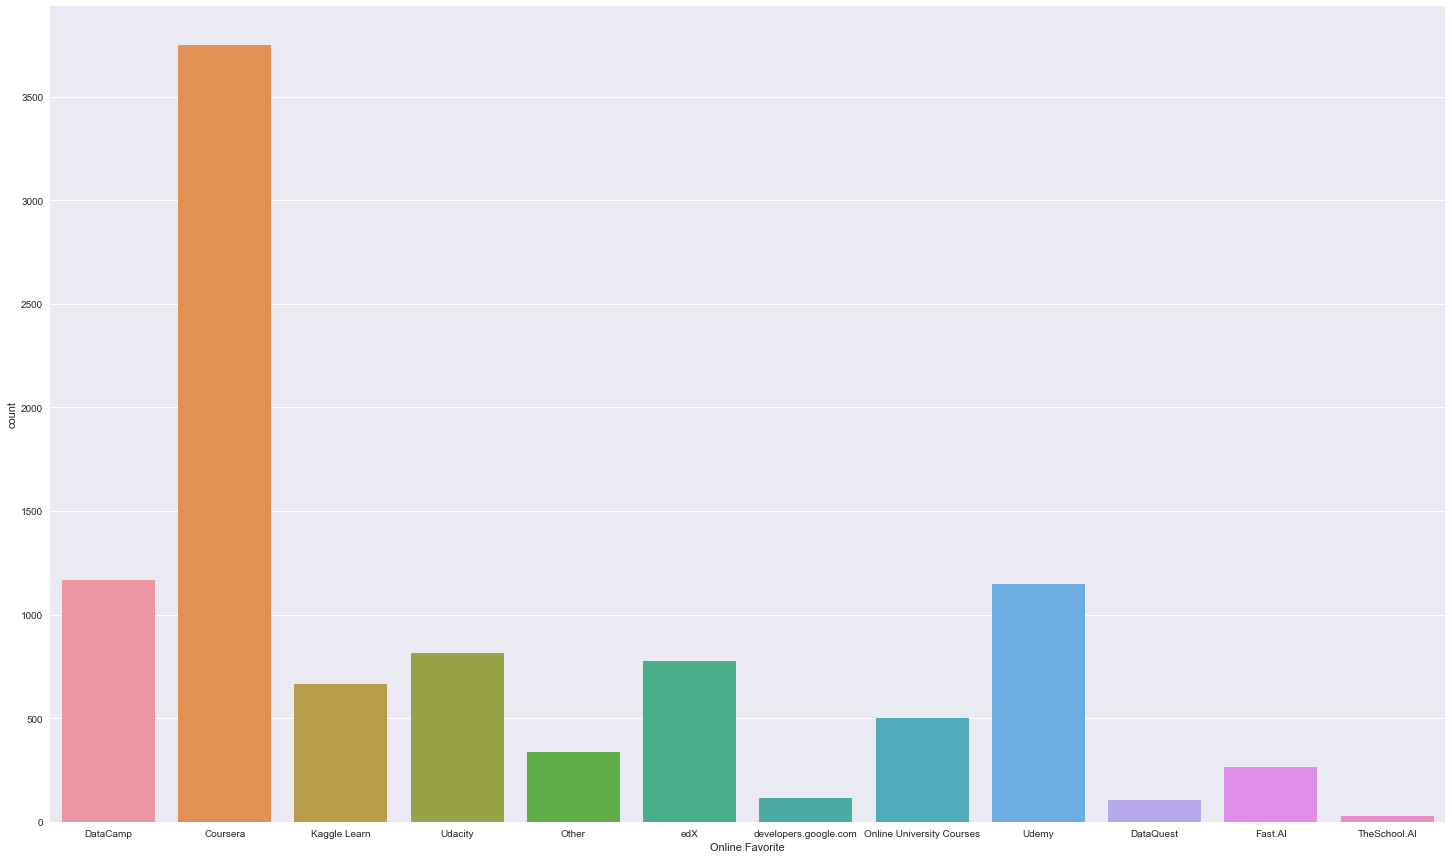

In [57]:
generate_vertical_countplot(x=onlineSourceDF.Online_Favorite,
                            xlabel="Online Favorite",
                            figName='Online Favorite Distribution.jpeg',
                            figSize=(25,15))

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "onlineSourceDF" in the analysis. We will clean up from memory.

In [58]:
onlineSourceDF.to_csv("online_favorite.csv",index=False)

In [59]:
del onlineSourceDF
gc.collect()

3287

### Who/what are your favorite media sources that report on data science topics?
* __Twitter__
* __Hacker News__
* __r/machinelearning__
* __Kaggle forums__
* __Fastai forums__
* __Siraj Raval YouTube Channel__
* __DataTau News Aggregator__
* __Linear Digressions Podcast__
* __Cloud AI Adventures (YouTube)__
* __FiveThirtyEight.com__
* __ArXiv & Preprints__
* __Journal Publications__
* __FastML Blog__
* __KDnuggets Blog__
* __O'Reilly Data Newsletter__
* __Partially Derivative Podcast__
* __The Data Skeptic Podcast__
* __Medium Blog Posts__
* __Towards Data Science Blog__
* __Analytics Vidhya Blog__
* __None/I do not know__
* __Other__

In [60]:
mediaSourcesDF = multipleChoiceDF[['Q38_Part_1','Q38_Part_2','Q38_Part_3','Q38_Part_4','Q38_Part_5','Q38_Part_6',
                                  'Q38_Part_7','Q38_Part_8','Q38_Part_9','Q38_Part_10','Q38_Part_11','Q38_Part_12',
                                  'Q38_Part_13','Q38_Part_14','Q38_Part_15','Q38_Part_16','Q38_Part_17','Q38_Part_18',
                                  'Q38_Part_19','Q38_Part_20','Q38_Part_21','Q38_Part_22']]

In [61]:
mediaSourcesDF.head()

,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,...,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22
0,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,Twitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not know,NaN
3,Twitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not know,NaN


In [62]:
mediaSourcesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 22 columns):
Q38_Part_1     3139 non-null object
Q38_Part_2     2013 non-null object
Q38_Part_3     3060 non-null object
Q38_Part_4     5564 non-null object
Q38_Part_5     764 non-null object
Q38_Part_6     2025 non-null object
Q38_Part_7     223 non-null object
Q38_Part_8     543 non-null object
Q38_Part_9     605 non-null object
Q38_Part_10    1544 non-null object
Q38_Part_11    3143 non-null object
Q38_Part_12    2150 non-null object
Q38_Part_13    684 non-null object
Q38_Part_14    3051 non-null object
Q38_Part_15    1539 non-null object
Q38_Part_16    317 non-null object
Q38_Part_17    672 non-null object
Q38_Part_18    5012 non-null object
Q38_Part_19    1 non-null object
Q38_Part_20    1 non-null object
Q38_Part_21    3105 non-null object
Q38_Part_22    1561 non-null object
dtypes: object(22)
memory usage: 4.0+ MB


From the visual and programmatic analysis:
* There are rows with missing data, but deviating from data we explored till now, missing information is expected per record as selections are optional. We will melt into one single column removing missing values, and use this column for analysis.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* Column names are not informative, we will rename columns with more informative names.

In [63]:
mediaSourcesDF.drop([0],inplace=True)
mediaSourcesDF.reset_index(drop=True,inplace=True)

In [64]:
mediaSourcesDF.head()

,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,...,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22
0,Twitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not know,NaN
2,Twitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not know,NaN
4,NaN,NaN,NaN,Kaggle forums,NaN,NaN,DataTau News Aggregator,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
mediaSourcesDF = pd.melt(mediaSourcesDF)

In [66]:
mediaSourcesDF.head()

,variable,value
0,Q38_Part_1,Twitter
1,Q38_Part_1,NaN
2,Q38_Part_1,Twitter
3,Q38_Part_1,NaN
4,Q38_Part_1,NaN


In [67]:
mediaSourcesDF.drop(columns=['variable'],inplace=True)

In [68]:
mediaSourcesDF.dropna(inplace=True)
mediaSourcesDF.reset_index(drop=True,inplace=True)

In [69]:
mediaSourcesDF.rename(columns={'value':'Media_Sources'},inplace=True)

__A major drawback of online resources is that with ever-changing technology landscape some of the courses might become stale. Forums, blogs, YouTube channels, newsletters and podcast series are used to be up to date.__

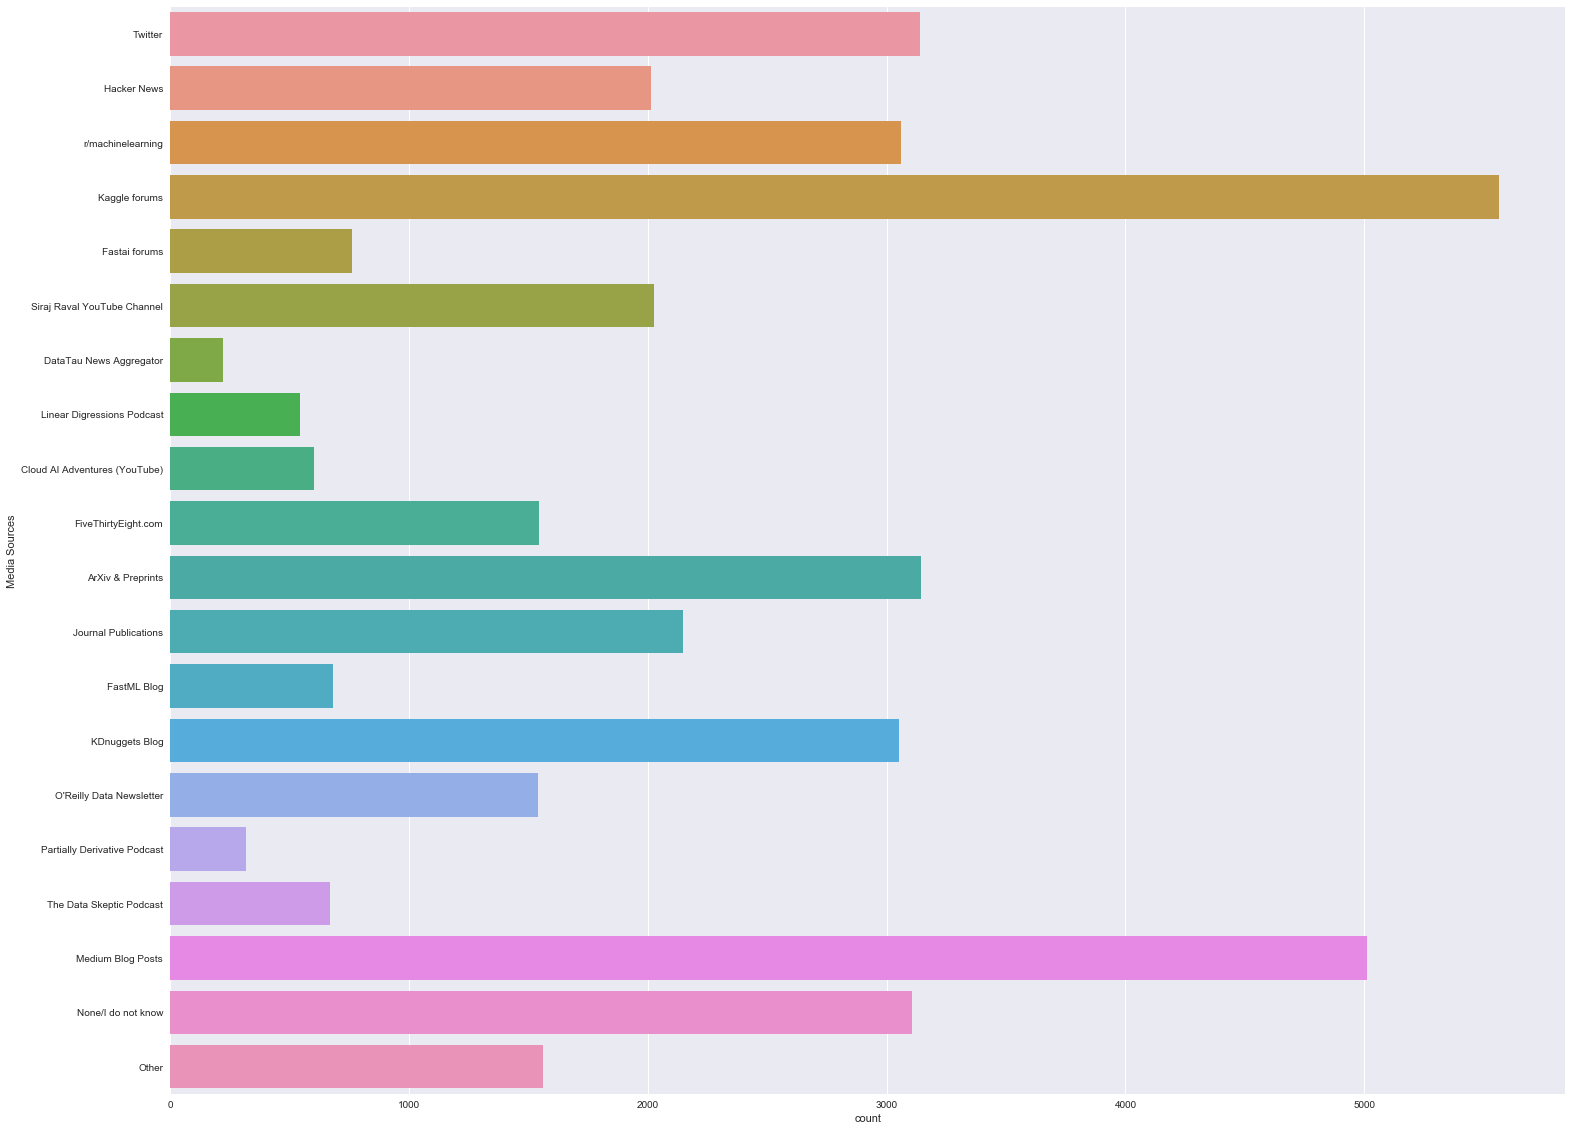

In [70]:
generate_horizontal_countplot(y=mediaSourcesDF.Media_Sources,
                             figSize=(25,20),
                             ylabel = 'Media Sources',
                             figName = 'Media Sources Distribution.jpeg')

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "onlineSourceDF" in the analysis. We will clean up from memory.

In [71]:
mediaSourcesDF.to_csv("media_source.csv",index=False)

In [72]:
del mediaSourcesDF
gc.collect()

4061

### How do you perceive the quality of online learning platforms and in-person boot camps as compared to the quality of the education provided by traditional brick and mortar institutions?

In [73]:
moocBootVsUnivDF = multipleChoiceDF[['Q39_Part_1','Q39_Part_2']]

In [74]:
moocBootVsUnivDF.head()

,Q39_Part_1,Q39_Part_2
0,How do you perceive the quality of online lear...,How do you perceive the quality of online lear...
1,Much better,Much worse
2,Slightly worse,No opinion; I do not know
3,Slightly worse,Slightly better
4,Much worse,No opinion; I do not know


In [75]:
moocBootVsUnivDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 2 columns):
Q39_Part_1    15980 non-null object
Q39_Part_2    15980 non-null object
dtypes: object(2)
memory usage: 372.9+ KB


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* Column names are not informative, we will rename columns with more informative names.

In [76]:
moocBootVsUnivDF.drop([0],inplace=True)

In [77]:
moocBootVsUnivDF.dropna(inplace=True)
moocBootVsUnivDF.reset_index(drop=True,inplace=True)

__Most of the survey respondents have voted online courses are better or as good as the traditional education. On another hand, many participants have no exposure to Boot Camp training.__

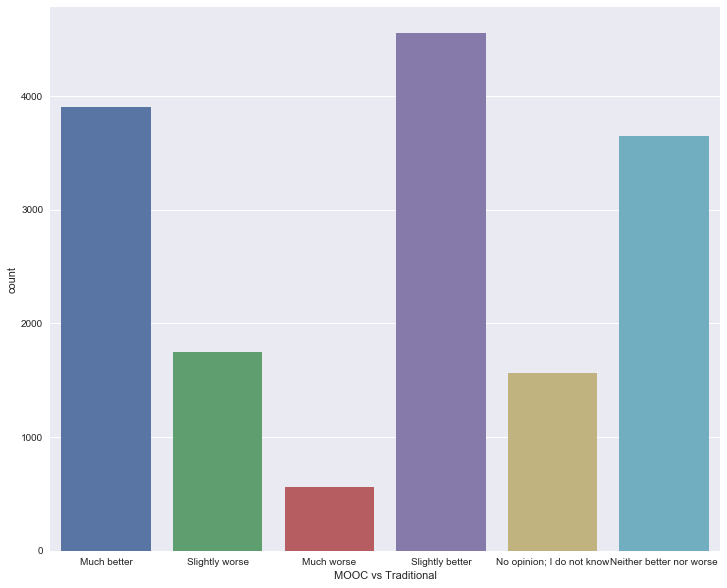

In [78]:
generate_vertical_countplot(x=moocBootVsUnivDF.Q39_Part_1,
                            xlabel="MOOC vs Traditional",
                            figName='MOOC vs Univ Distribution.jpeg',
                            figSize=(12,10))

__Boot Camps provide the best of traditional (in-person training) and online education (flexible time-frame). At the same time, Boot Camps are very expensive and are only available in major cities.__

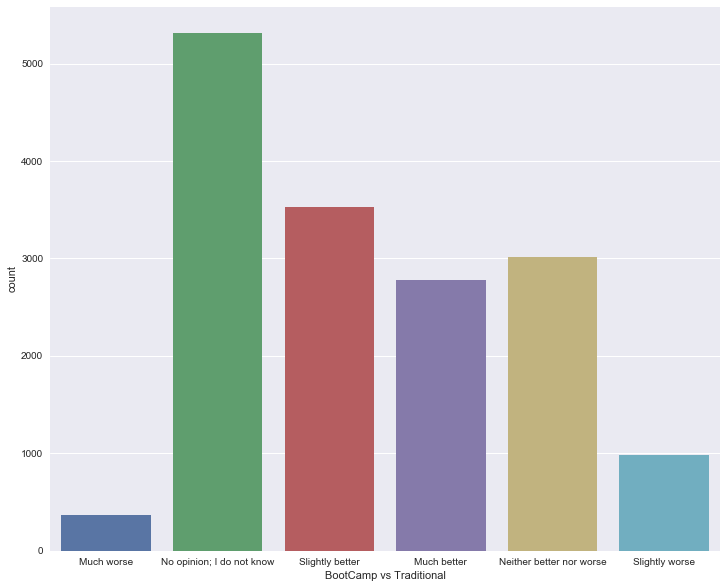

In [79]:
generate_vertical_countplot(x=moocBootVsUnivDF.Q39_Part_2,
                            xlabel="BootCamp vs Traditional",
                            figName='BootCamp vs Univ Distribution.jpeg',
                            figSize=(12,10))

In [80]:
moocBootVsUnivDF.rename(columns={'Q39_Part_1':'MOOC','Q39_Part_2':'BootCamp'},inplace=True)

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "moocBootVsUnivDF" in the analysis. We will clean up from memory.

In [81]:
moocBootVsUnivDF.to_csv("moocBootVsUniv.csv",index=False)

### Conclusion

In this notebook, we have analyzed prior education and training pursued survey takers along with basic questions like what is the highest level of education? What is the undergraduate major? What is the source of machine learning knowledge? Which online platforms they use and like? How they rate traditional education with MOOCs & boot camps?